In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from scipy.stats import norm, skew

import warnings
warnings.filterwarnings('ignore')

In [14]:
dataset = pd.read_csv('Project 1_dataset_bank-full.csv')
df_bank_pd = dataset.copy() #Creating the copy of the dataframe 
df_bank_pd.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [15]:
df_bank_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [16]:
df_bank_yes = df_bank_pd[df_bank_pd.y == 'yes']
df_bank_no = df_bank_pd[df_bank_pd.y == 'no']

In [18]:
from pycaret.clustering import *

In [19]:
s = setup(df_bank_no, normalize = True)

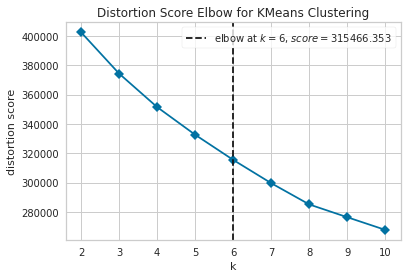

In [23]:
plot_model(kmeans, 'elbow')

In [24]:
kmeans = create_model('kmeans', num_clusters=6)

Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.1143          3561.3712          1.9073            0           0   

   Completeness  
0             0

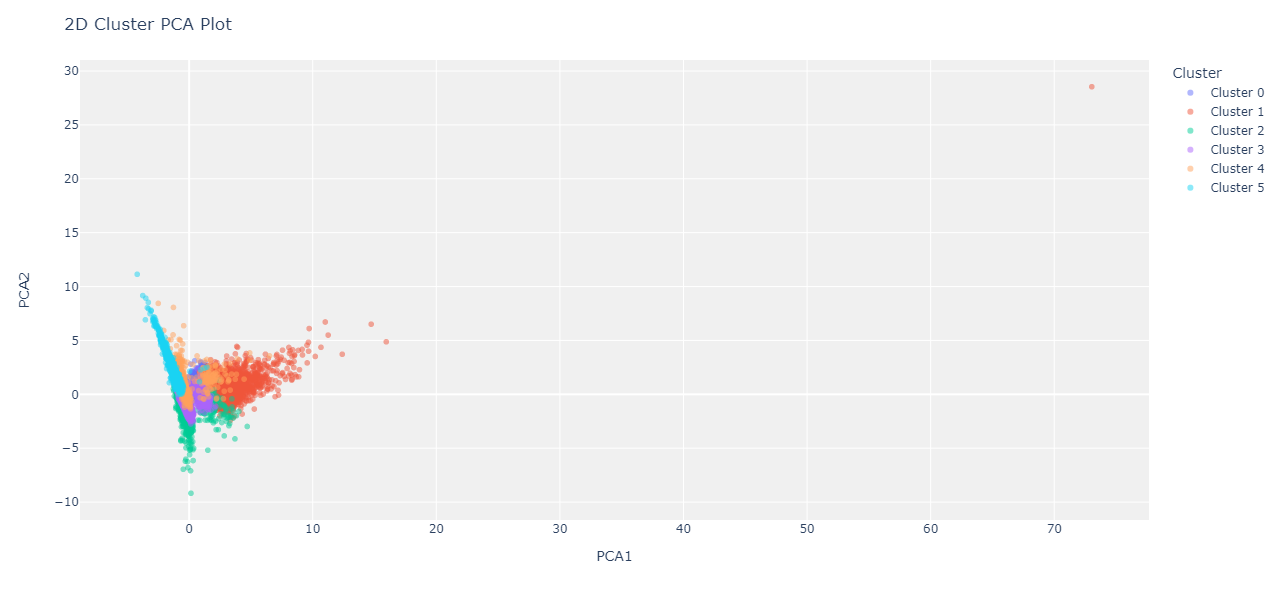

In [26]:
plot_model(kmeans, 'cluster')

In [27]:
kmeans_results = assign_model(kmeans)
kmeans_results.head(10)

age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  \
0  unknown    5   may       261         1     -1         0  unknown  no   
1  unknown    5   may       151         1     -1         0  unknown  no   
2  unknown    5   may        76         1     -1         0  unknown  no   
3  unknown    5   may        92         1     -1         0  unknown  no   
4  unknown    5   may       198         1     -1         0  unknown  no   
5  unknown    5   may       139         1     -1         0  unknown  no   
6  unknown    5   may       217         1     -1         0  unknown  no   
7  unknown    5   may       380         1     -1         0  unknown  no   
8  unknown    5   may        50         1     -1         0  unknown  no   
9  unknown    5   may        55         1     -1         0  unknown  no   

     Cluster  
0  Cluster 0  
1  Cluster 3  
2  Cluster 3  
3  Cluster 0  
4  Cluster 3  
5  Cluster 3  
6  Cluster 3  
7  Cluster 3  
8  Cluster 0  
9  Cluster 3

In [39]:
gr_df = kmeans_results.groupby('Cluster')['age'].value_counts()
gr_df

Cluster    age
Cluster 0  46     746
           45     726
           47     721
           49     711
           48     684
                 ... 
Cluster 5  19       2
           61       2
           20       1
           22       1
           62       1
Name: age, Length: 299, dtype: int64

<AxesSubplot:xlabel='Cluster'>

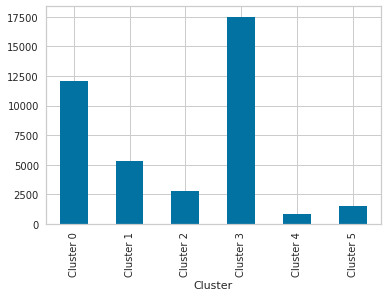

In [33]:
kmeans_results.groupby(['Cluster']).size().plot(kind = "bar")